<a href="https://colab.research.google.com/github/SebastianCorreaG/githubCodigoFacil/blob/main/Codigo_Facilito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Codigo Facilito

# Instalar pandas profilling e importar librerias

In [2]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
%matplotlib inline
pd.set_option('display.max_colwidth', None)

# Cargar Datos desde drive

In [4]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
df1 = pd.read_csv("/content/drive/MyDrive/datos/230110COVID19MEXICO.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Analisis exploratorio de datos

Valores 

In [6]:
df1.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2023-01-10,1b450d,2,12,15,1,15,9,7,1,...,1,2,97,1,2,7,99,México,97,97
1,2023-01-10,09675e,1,12,16,1,16,16,66,1,...,2,2,97,1,1,3,99,México,97,97
2,2023-01-10,15ec76,1,12,5,2,5,5,35,1,...,2,2,97,1,1,3,99,México,97,97
3,2023-01-10,1a051c,2,12,5,1,5,5,30,1,...,2,2,97,1,2,7,99,México,97,97
4,2023-01-10,17d402,2,12,9,2,9,9,8,1,...,2,2,97,1,2,7,99,México,97,97


In [7]:
df1.sample(10)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
4687914,2023-01-10,g3360ac,2,4,15,2,15,15,60,1,...,2,2,97,1,1,3,99,México,97,97
5472003,2023-01-10,g37ef7a,2,12,7,2,7,7,89,1,...,2,2,97,2,97,6,99,México,97,97
738863,2023-01-10,ac5e84,2,12,9,1,9,9,10,1,...,2,2,97,1,1,3,99,México,97,97
5857639,2023-01-10,g2a7ab0,2,9,9,1,9,9,14,1,...,99,2,97,1,1,3,99,México,97,97
6377346,2023-01-10,g434c68,2,4,30,1,30,30,48,1,...,2,2,97,1,2,7,99,México,97,97
4936075,2023-01-10,g30f2be,1,4,13,1,9,13,48,2,...,2,1,1,1,1,3,99,México,97,2
3384708,2023-01-10,g126b54,2,9,24,2,24,24,2,1,...,2,2,97,2,97,6,99,México,97,97
3836783,2023-01-10,g14bba4,2,4,16,2,16,16,53,1,...,1,2,97,1,1,3,99,México,97,97
4142156,2023-01-10,g0ba8ec,2,12,16,1,16,16,53,1,...,2,2,97,1,2,7,99,México,97,97
6387906,2023-01-10,g297cfe,2,4,30,1,30,30,87,1,...,2,2,97,1,1,3,99,México,97,97


In [8]:
df1.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,UCI
count,6.470943e+06,6.470943e+06,6.470943e+06,6.470943e+06,6.470943e+06,6.470943e+06,6.470943e+06,6.470943e+06,6.470943e+06,6.470943e+06,...,6.470943e+06,6.470943e+06,6.470943e+06,6.470943e+06,6.470943e+06,6.470943e+06,6.470943e+06,6.470943e+06,6.470943e+06,6.470943e+06
mean,1.769351e+00,7.860172e+00,1.457066e+01,1.433163e+00,1.569141e+01,1.476274e+01,3.760560e+01,1.041159e+00,9.309099e+01,2.965096e+00,...,2.363679e+00,2.332422e+00,3.883863e+00,1.846422e+00,8.237371e+01,1.127824e+00,1.370584e+01,4.963352e+00,9.830321e+01,9.309116e+01
std,4.212480e-01,3.959845e+00,7.944715e+00,4.955128e-01,1.079235e+01,7.890763e+00,9.114474e+01,1.986584e-01,1.887461e+01,9.713688e+00,...,5.958464e+00,5.988678e+00,1.425282e+01,3.605442e-01,3.433829e+01,3.338941e-01,3.189084e+01,2.009411e+00,8.202738e+00,1.887382e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.000000e+00,4.000000e+00,9.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00,7.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,1.000000e+00,1.000000e+00,3.000000e+00,9.900000e+01,9.700000e+01
50%,2.000000e+00,9.000000e+00,1.100000e+01,1.000000e+00,1.400000e+01,1.300000e+01,1.500000e+01,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,1.000000e+00,2.000000e+00,6.000000e+00,9.900000e+01,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.100000e+01,2.000000e+00,2.100000e+01,2.100000e+01,3.900000e+01,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,1.000000e+00,2.000000e+00,7.000000e+00,9.900000e+01,9.700000e+01
max,2.000000e+00,9.900000e+01,3.200000e+01,2.000000e+00,9.900000e+01,3.200000e+01,9.990000e+02,2.000000e+00,9.900000e+01,9.900000e+01,...,9.800000e+01,9.800000e+01,9.900000e+01,2.000000e+00,9.700000e+01,2.000000e+00,9.700000e+01,7.000000e+00,9.900000e+01,9.900000e+01


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6470943 entries, 0 to 6470942
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUSUP

In [10]:
df1['FECHA_SINTOMAS'] = pd.to_datetime(df1['FECHA_SINTOMAS'])

In [11]:
df1['FECHA_INGRESO'] = pd.to_datetime(df1['FECHA_INGRESO'])

In [12]:
df1['FECHA_ACTUALIZACION'] = pd.to_datetime(df1['FECHA_ACTUALIZACION'])

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6470943 entries, 0 to 6470942
Data columns (total 40 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   FECHA_ACTUALIZACION    datetime64[ns]
 1   ID_REGISTRO            object        
 2   ORIGEN                 int64         
 3   SECTOR                 int64         
 4   ENTIDAD_UM             int64         
 5   SEXO                   int64         
 6   ENTIDAD_NAC            int64         
 7   ENTIDAD_RES            int64         
 8   MUNICIPIO_RES          int64         
 9   TIPO_PACIENTE          int64         
 10  FECHA_INGRESO          datetime64[ns]
 11  FECHA_SINTOMAS         datetime64[ns]
 12  FECHA_DEF              object        
 13  INTUBADO               int64         
 14  NEUMONIA               int64         
 15  EDAD                   int64         
 16  NACIONALIDAD           int64         
 17  EMBARAZO               int64         
 18  HABLA_LENGUA_INDIG    

In [21]:
report = ProfileReport(df1, minimal=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df1.INTUBADO.astype(int).describe()

count    6.470943e+06
mean     9.309099e+01
std      1.887461e+01
min      1.000000e+00
25%      9.700000e+01
50%      9.700000e+01
75%      9.700000e+01
max      9.900000e+01
Name: INTUBADO, dtype: float64

In [18]:
(df1.INTUBADO
   
   .value_counts()
   .rename('Observaciones por número de dígitos de PREGUNTAR_QUE_SIGNIFICA')
   .sort_index())

1       11409
2      254738
97    6204604
99        192
Name: Observaciones por número de dígitos de PREGUNTAR_QUE_SIGNIFICA, dtype: int64

# Visualizacion Efectiva

Como se ha comportado la evolucion de los sintomas de los casos covid

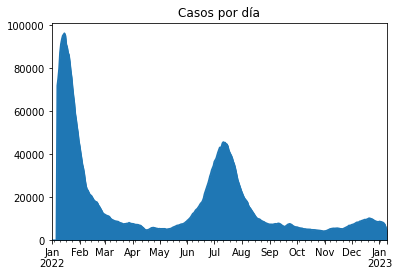

In [14]:
(df1.FECHA_SINTOMAS
   .dt.to_period('d')
   .value_counts()
   .sort_index()
   .rolling(7).mean()
   .plot.area(title='Casos por día'));

Sintomas por mes

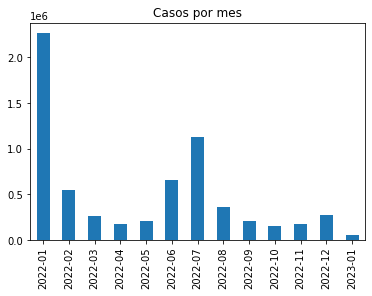

In [15]:
(df1.FECHA_SINTOMAS
   .dt.to_period('M')
   .value_counts()
   .sort_index()
   .plot.bar(title='Casos por mes'));

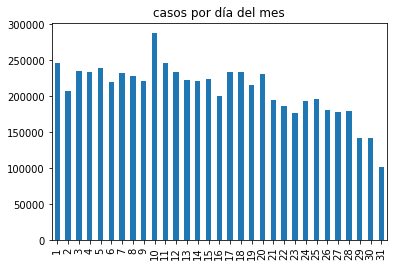

In [27]:
(df1.FECHA_SINTOMAS
   .dt.day
   .value_counts()
   .sort_index()
   .plot.bar(title='casos por día del mes'));

¿ Es el genero un influyente en los casos covid ?

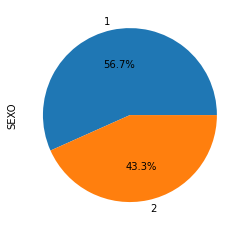

In [22]:
serie = df1.SEXO.value_counts()
serie.plot.pie(autopct='%1.1f%%')

¿Es la edad influyente en los casos covid?

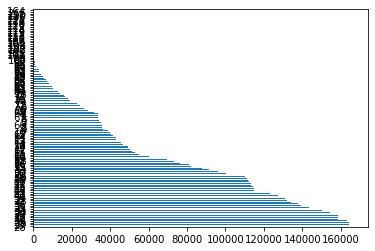

In [23]:
serie_edad = df1.EDAD.value_counts()
serie_edad.plot.barh()

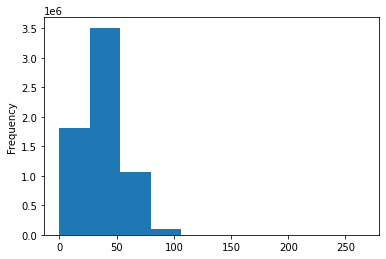

In [24]:
df1.EDAD.plot.hist()

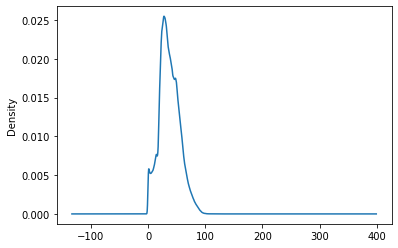

In [25]:
df1.EDAD.plot.density()

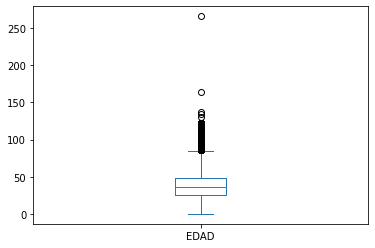

In [26]:
df1.EDAD.plot.box()

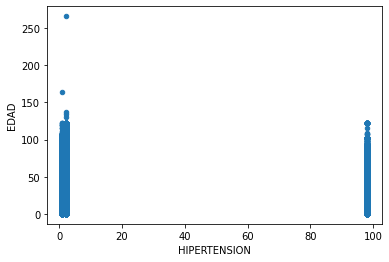

In [20]:
df1.plot.scatter(y="EDAD",x="HIPERTENSION")